# Import Libraries

In [159]:
#Loading the data from the local from file iris_challenging.csv
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans #Kmeans - It is used to partition a dataset into K distinct, non-overlapping clusters based on feature similarity.
from sklearn import metrics #Calculating Accuracy of the model 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #confusion matrix to analyze the result
from sklearn.model_selection import cross_val_score


# ---------------------------------------------------------------------

# Load Data from CSV file 

In [46]:
#Reading the CSV file using the pandas in to the dataframe
df = pd.read_csv('iris_challenging.csv')

#displaying the data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.993117,2.500989,4.542148,1.348742,versicolor
1,5.657568,3.714626,1.800290,0.531637,setosa
2,7.751423,2.662903,7.174372,2.335111,virginica
3,5.938142,3.034625,4.448674,1.426435,versicolor
4,7.054747,2.741609,4.268965,1.469104,versicolor
...,...,...,...,...,...
147,5.857968,3.949036,1.170024,0.305553,setosa
148,5.966645,2.334692,3.927622,1.186082,versicolor
149,7.197063,2.845467,5.882156,2.105997,virginica
150,10.000000,3.500000,8.000000,2.000000,virginica


## 1. Checking for data duplication

In [39]:
#Finding the duplicates in the given dataset
df.reset_index(drop=True, inplace=True)
duplicates = df.duplicated()
df[duplicates]

#We have no duplicate data in the rows


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species


## Analysis - We do not have the duplicated data in the given data.

# ---------------------------------------------------------------------

## 1. Check for Missing Data

## Checking for the column which has the Missing Data

In [50]:
#checking for the column which has the missing data
colval = df.columns[df.isnull().any()].tolist()
print(colval)

['sepal width (cm)']


## Analysis - Found the Missing Data in the "Sepal Width (cm)" Column

# ---------------------------------------------------------------------

## 1. (a) The Records with Missing Values

In [48]:
# Identify rows with missing values
DataMissing_rows = df[df.isnull().any(axis=1)]

# Print the rows with missing values
print(DataMissing_rows)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
18            5.635102               NaN           4.211992          1.538145   
31            5.911485               NaN           1.674489          0.613240   
64            5.513339               NaN           4.311822          1.474508   
73            5.768455               NaN           5.306520          1.537974   
76            6.185278               NaN           5.459096          2.080531   
78            4.909547               NaN           1.678274          0.388903   
118           5.676030               NaN           3.381097          1.117666   
141           6.560888               NaN           4.516092          0.931019   

        species  
18   versicolor  
31       setosa  
64   versicolor  
73    virginica  
76    virginica  
78       setosa  
118  versicolor  
141  versicolor  


## Descriptive statistics of DataFrame With Missing Values

In [49]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,152.000000,144.000000,152.000000,152.000000
mean,5.854023,3.050530,3.785097,1.232286
std,0.927025,0.469781,1.808425,0.755899
min,4.174695,2.000000,1.046191,-0.146066
25%,5.095226,2.692906,1.677963,0.479590
50%,5.810977,3.033138,4.280833,1.383734
75%,6.487654,3.371210,5.112278,1.839793
max,10.000000,4.571993,8.000000,2.556193


## Printing the rows with missing values

In [7]:
Data_Rows = df[df.isnull().any(axis=1)]
print(Data_Rows.isnull())
print(Data_Rows.isnull().mean())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
18               False              True              False             False   
31               False              True              False             False   
64               False              True              False             False   
73               False              True              False             False   
76               False              True              False             False   
78               False              True              False             False   
118              False              True              False             False   
141              False              True              False             False   

     species  
18     False  
31     False  
64     False  
73     False  
76     False  
78     False  
118    False  
141    False  
sepal length (cm)    0.0
sepal width (cm)     1.0
petal length (cm)    0.0
petal width (cm)     0.0
species              0.0
dtype: flo

# Graph with Missing Values

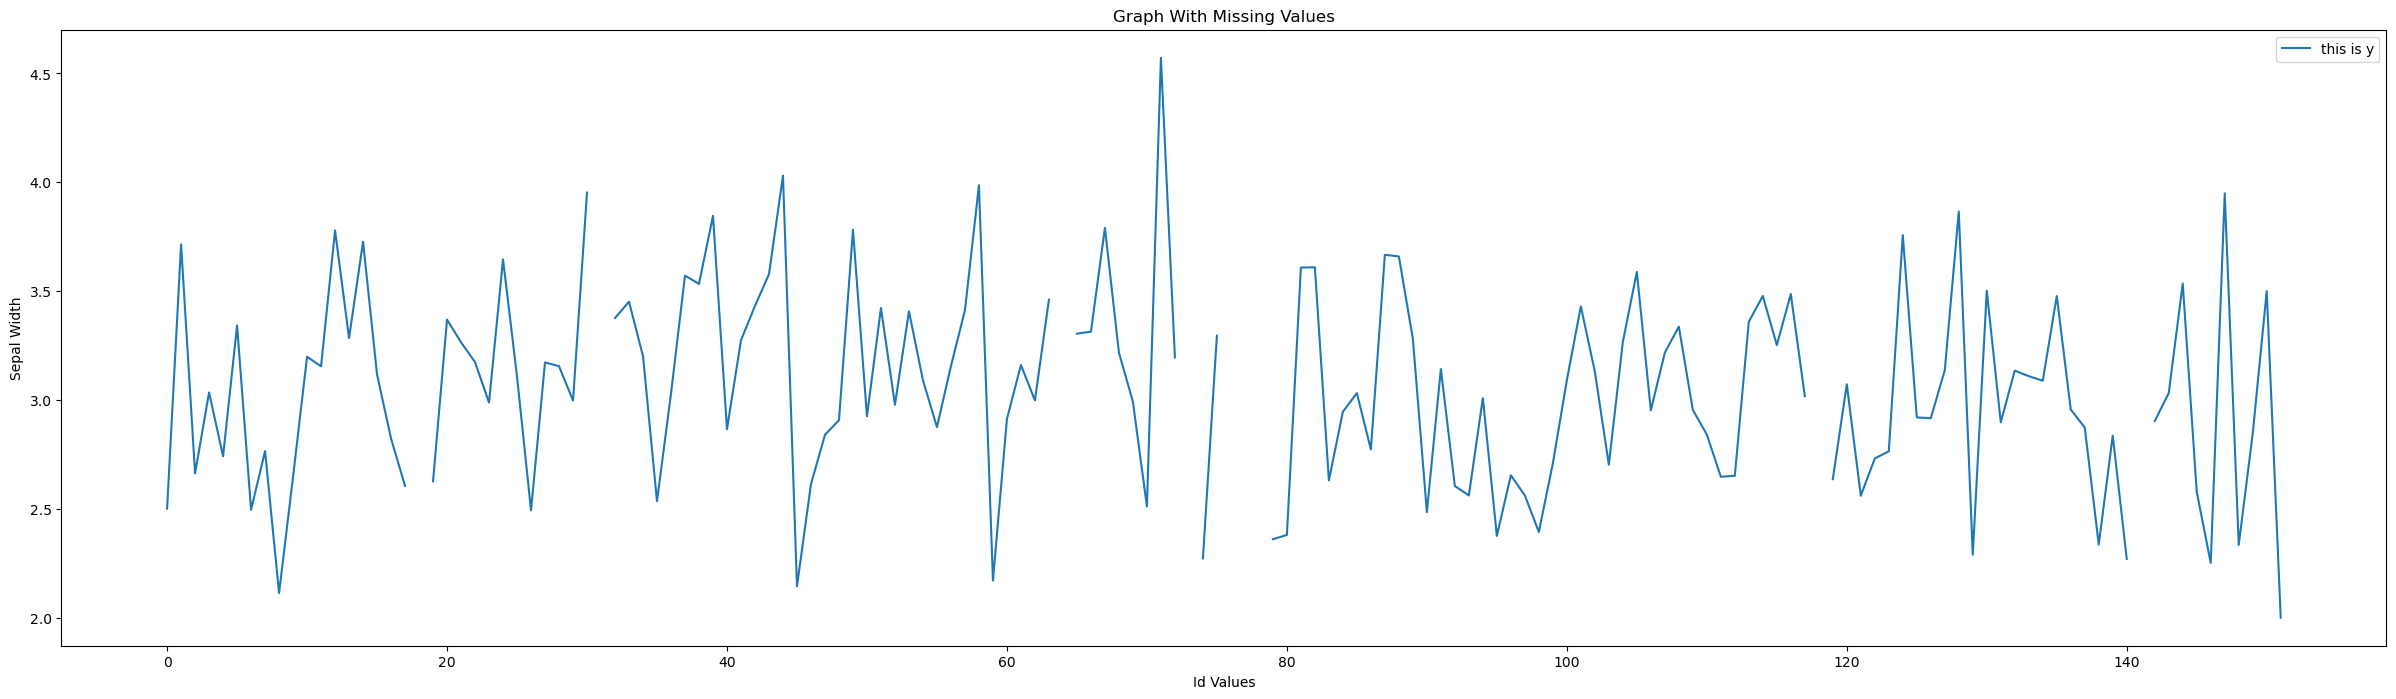

In [53]:
Column_to_graph = df['sepal width (cm)']
XAxisValue = np.arange(152)
plt.figure(figsize=(30, 8))
plt.plot(XAxisValue, Column_to_graph)
plt.xlabel('Id Values')
plt.ylabel('Sepal Width')
plt.title('Graph With Missing Values')
plt.legend(["this is y"])
plt.show()

# ---------------------------------------------------------------------

## 1.(a). (i) Checking By Dropping Rows

 # Graph with dropping the rows

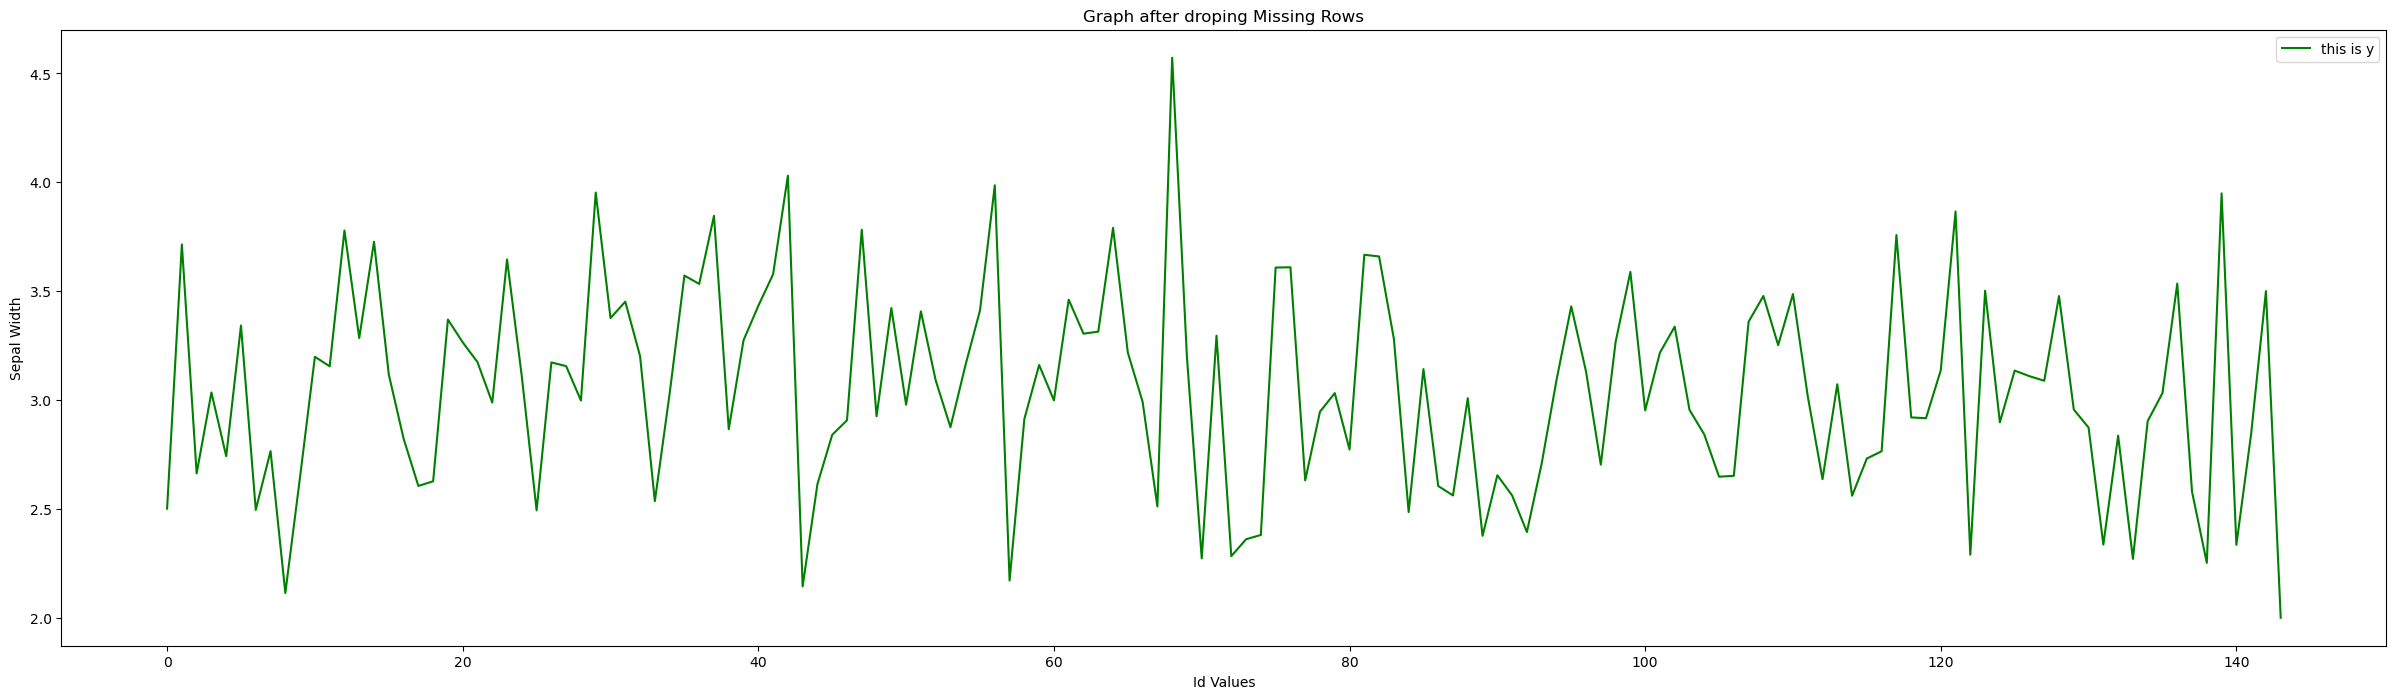

In [55]:
df_copy = df.copy()
df_drop = df_copy.dropna()

#print(df.loc[18,'sepal width (cm)'])
plt.figure(figsize=(30, 8))
Column_to_graph = df_drop['sepal width (cm)']
XAxisValue = np.arange(144) #(152)#(144)
plt.plot(XAxisValue, Column_to_graph, color='green')
plt.xlabel('Id Values')
plt.ylabel('Sepal Width')
plt.title('Graph after droping Missing Rows')
plt.legend(["this is y"])
plt.show()


## Descriptive statistics of DataFrame With Dropping Values

In [54]:
df_drop.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,144.000000,144.000000,144.000000,144.000000
mean,5.858691,3.050530,3.783301,1.233510
std,0.946302,0.469781,1.829560,0.766954
min,4.174695,2.000000,1.046191,-0.146066
25%,5.069533,2.692906,1.667794,0.471187
50%,5.821307,3.033138,4.280833,1.383734
75%,6.498992,3.371210,5.112278,1.871091
max,10.000000,4.571993,8.000000,2.556193


## 1.(a). (i) Imputation with Median Value

In [57]:
df_c = df.copy()
df_c['sepal width (cm)'] = df_c['sepal width (cm)'].fillna(df_c['sepal width (cm)'].median())

#df['sepal width (cm)'] = df['sepal width (cm)'].fillna(df['sepal width (cm)'].median())

#Checking the Rows with missing values is updated or not
print(df_c.loc[18,'sepal width (cm)'])
print(df_c.loc[31,'sepal width (cm)'])
print(df_c.loc[64,'sepal width (cm)'])
print(df_c.loc[73,'sepal width (cm)'])
print(df_c.loc[76,'sepal width (cm)'])
print(df_c.loc[78,'sepal width (cm)'])
print(df_c.loc[118,'sepal width (cm)'])
print(df_c.loc[141,'sepal width (cm)'])

3.033138148372734
3.033138148372734
3.033138148372734
3.033138148372734
3.033138148372734
3.033138148372734
3.033138148372734
3.033138148372734


## Descriptive statistics of DataFrame With Median Values

In [56]:
df_c.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,152.000000,152.000000,152.000000,152.000000
mean,5.854023,3.049615,3.785097,1.232286
std,0.927025,0.457184,1.808425,0.755899
min,4.174695,2.000000,1.046191,-0.146066
25%,5.095226,2.725631,1.677963,0.479590
50%,5.810977,3.033138,4.280833,1.383734
75%,6.487654,3.346516,5.112278,1.839793
max,10.000000,4.571993,8.000000,2.556193


# Graph with Imputation with median values

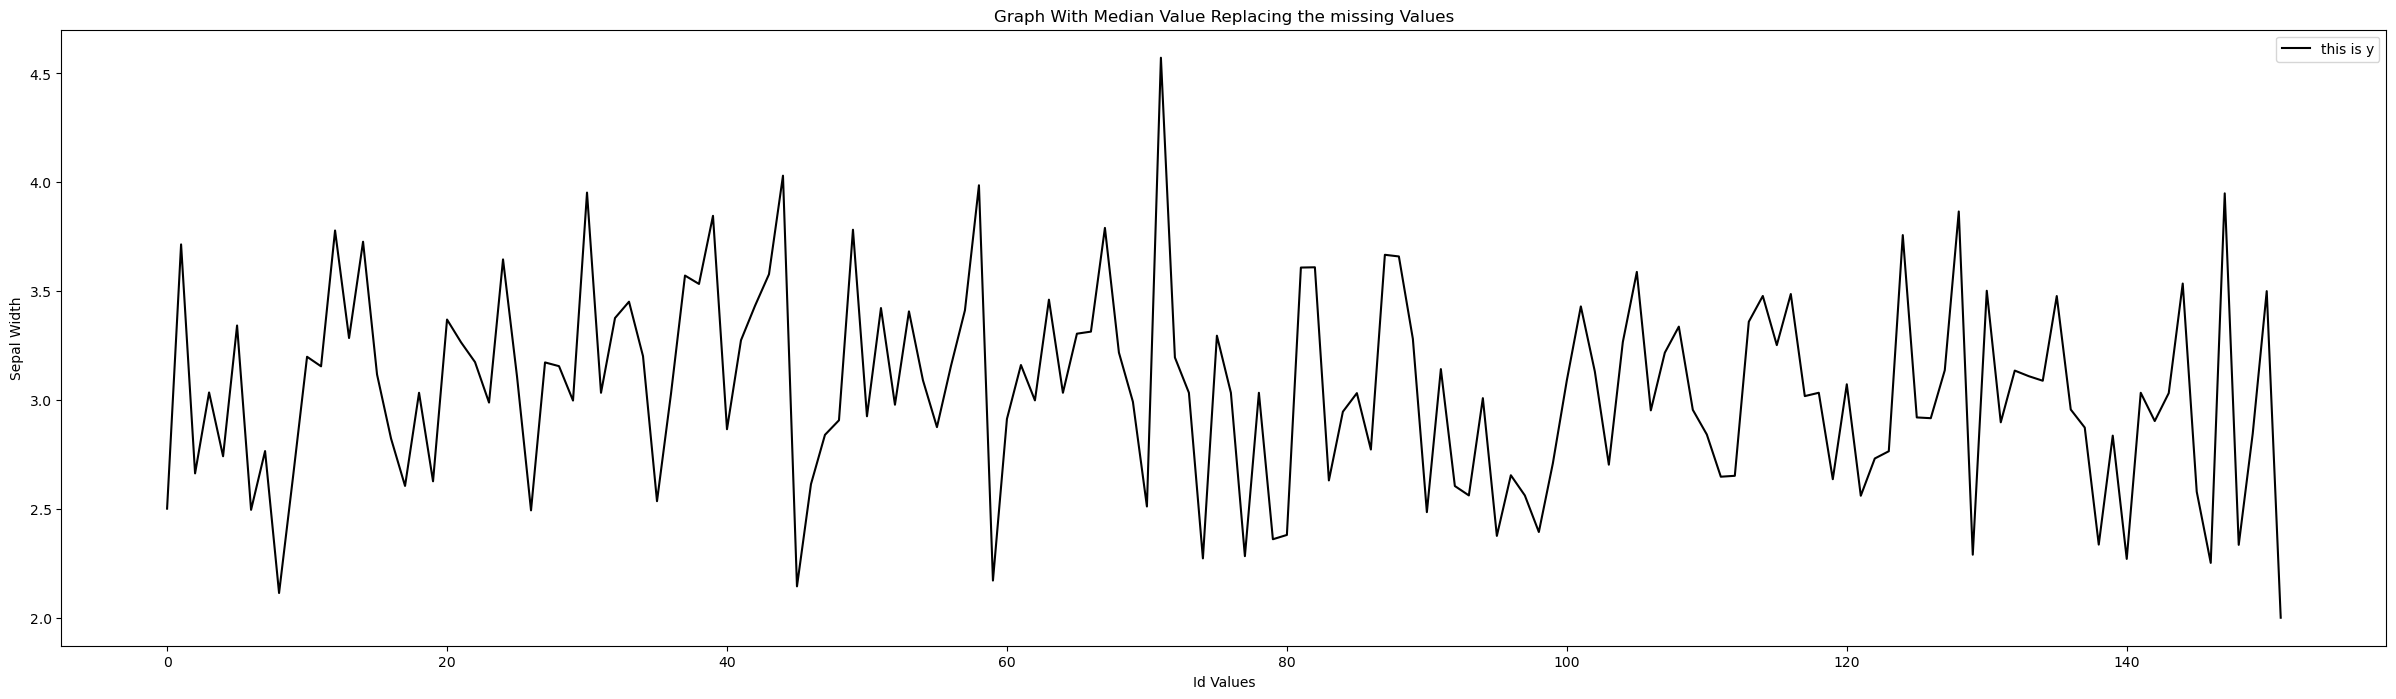

In [11]:
plt.figure(figsize=(30, 8))
Column_to_graph = df_c['sepal width (cm)']
XAxisValue = np.arange(152)
plt.plot(XAxisValue, Column_to_graph, color='black')
plt.xlabel('Id Values')
plt.ylabel('Sepal Width')
plt.title('Graph With Median Value Replacing the missing Values')
plt.legend(["this is y"])
plt.show()

# 1. (a). (i) Imputation with Mean Value

In [60]:
df_M = df.copy()
df_M['sepal width (cm)'] = df_M['sepal width (cm)'].fillna(df_M['sepal width (cm)'].mean())


#Checking the Rows with missing values is updated or not
print(df_M.loc[18,'sepal width (cm)'])
print(df_M.loc[31,'sepal width (cm)'])
print(df_M.loc[64,'sepal width (cm)'])
print(df_M.loc[73,'sepal width (cm)'])
print(df_M.loc[76,'sepal width (cm)'])
print(df_M.loc[78,'sepal width (cm)'])
print(df_M.loc[118,'sepal width (cm)'])
print(df_M.loc[141,'sepal width (cm)'])

3.0505301438798096
3.0505301438798096
3.0505301438798096
3.0505301438798096
3.0505301438798096
3.0505301438798096
3.0505301438798096
3.0505301438798096


## Descriptive statistics of DataFrame With Mean Values

In [59]:
df_M.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,152.000000,152.000000,152.000000,152.000000
mean,5.854023,3.050530,3.785097,1.232286
std,0.927025,0.457167,1.808425,0.755899
min,4.174695,2.000000,1.046191,-0.146066
25%,5.095226,2.725631,1.677963,0.479590
50%,5.810977,3.050530,4.280833,1.383734
75%,6.487654,3.346516,5.112278,1.839793
max,10.000000,4.571993,8.000000,2.556193


# Graph with Imputation with mean values

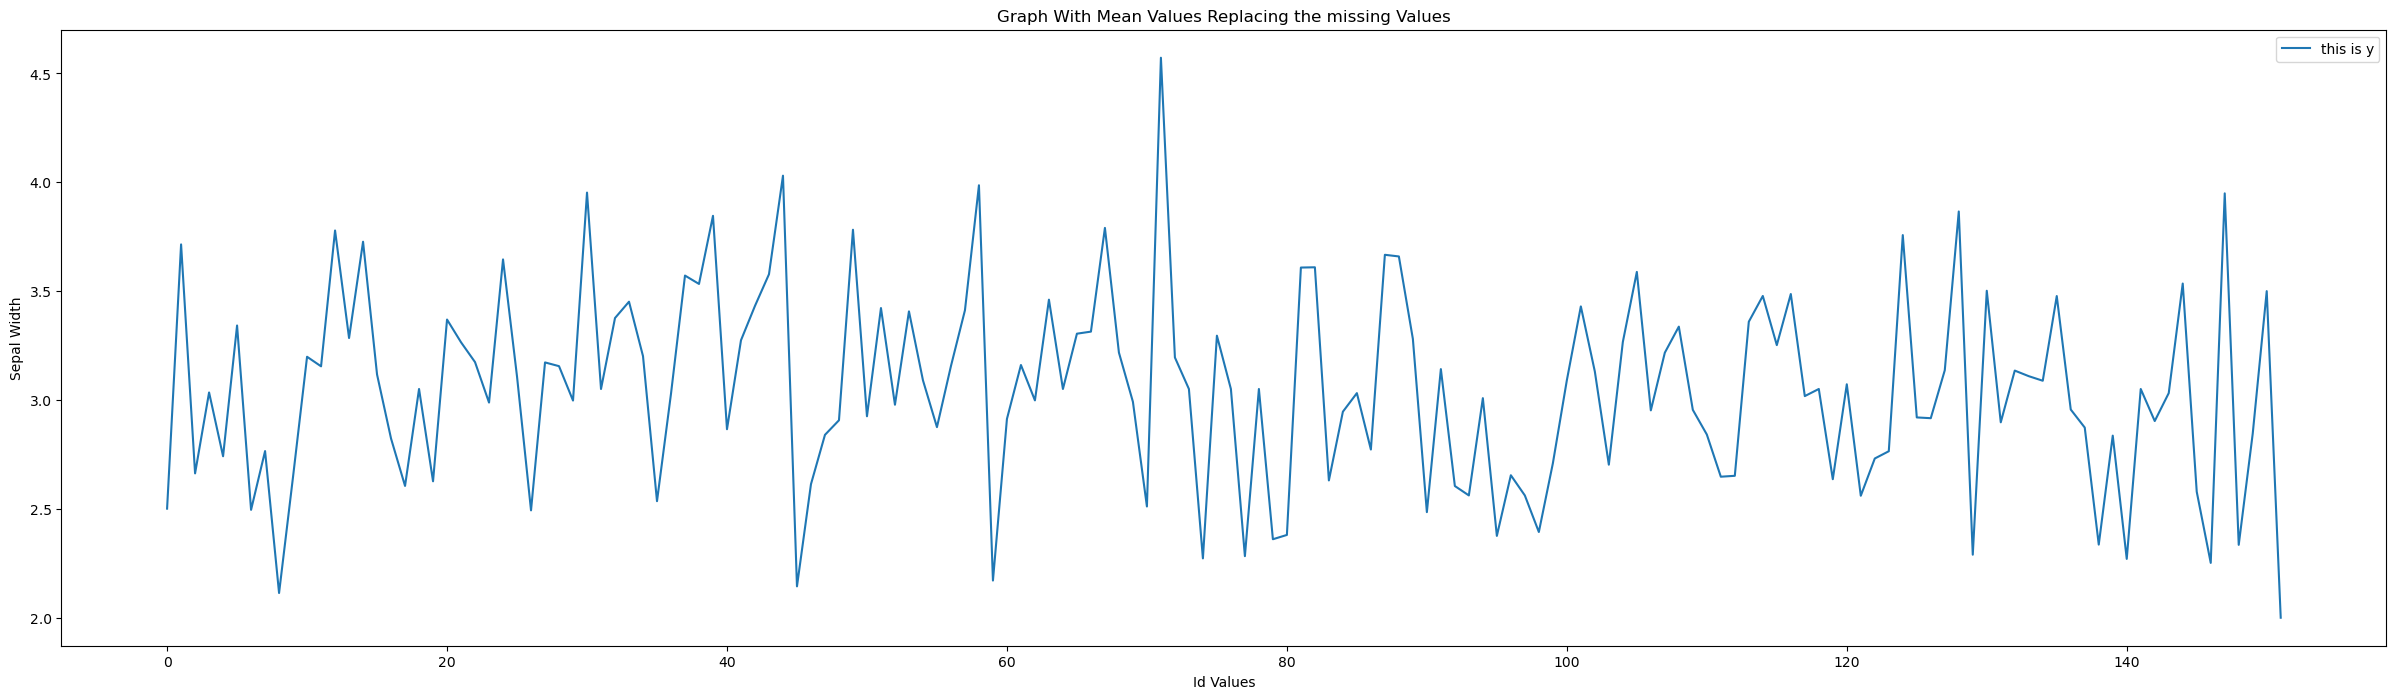

In [13]:
plt.figure(figsize=(30, 8))
Column_to_graph = df_M['sepal width (cm)']
XAxisValue = np.arange(152)
plt.plot(XAxisValue, Column_to_graph)
plt.xlabel('Id Values')
plt.ylabel('Sepal Width')
plt.title('Graph With Mean Values Replacing the missing Values')
plt.legend(["this is y"])
plt.show()


# Comparing Mean, Median and Dropping Rows

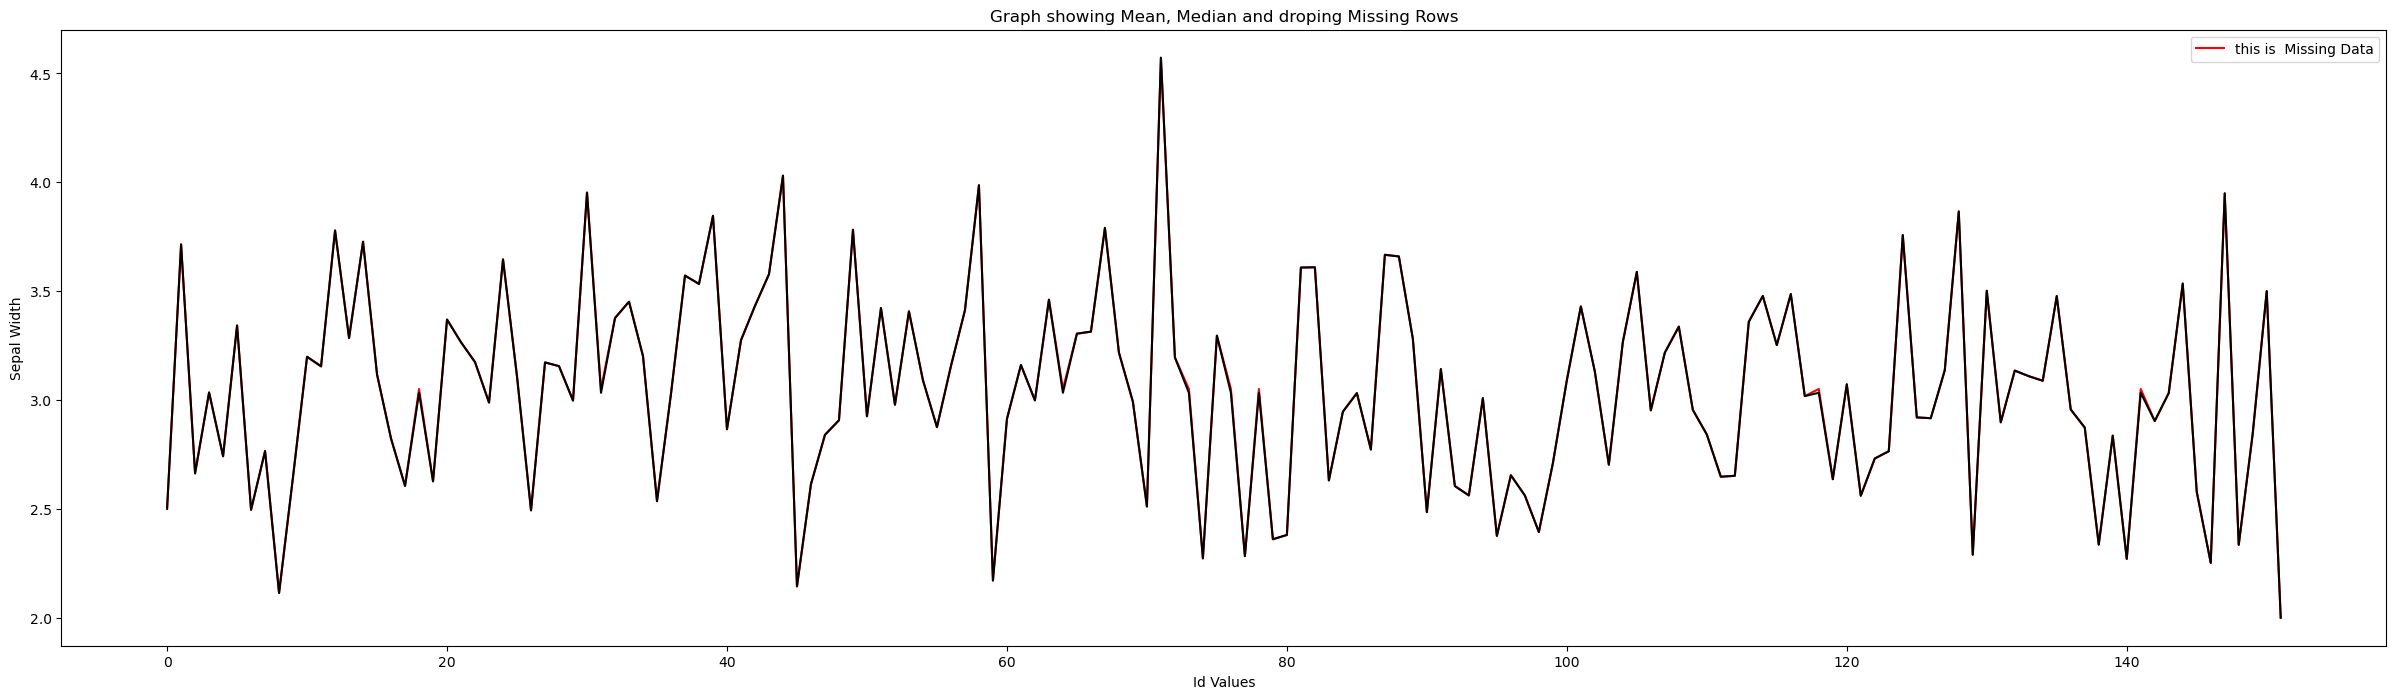

In [14]:
plt.figure(figsize=(30, 8))

'''
#Data from the dropping of the rows of missing data
Column_to_graph = df_drop['sepal width (cm)']
XAxisValue = np.arange(144)
plt.plot(XAxisValue, Column_to_graph, color='green')
'''

'''
#Orginal Data
Column_to_grph = df['sepal width (cm)']
XAxisVal = np.arange(152)
plt.plot(XAxisVal, Column_to_grph, color='green')
'''
#Data with the Mean values
Column_to_graph2 = df_M['sepal width (cm)']
XAxisValue2 = np.arange(152)
plt.plot(XAxisValue2, Column_to_graph2, color='red')

#Data with the Median values
Column_to_graph3 = df_c['sepal width (cm)']
XAxisValue3 = np.arange(152)
plt.plot(XAxisValue3, Column_to_graph3, color='black')

plt.xlabel('Id Values')
plt.ylabel('Sepal Width')
plt.title('Graph showing Mean, Median and droping Missing Rows')
plt.legend(["this is  Missing Data"])
plt.show()


## Analysis - about which is used from the Mean, Median and Deleting duplicate rows.

## When examining the descriptive statistics, the mean can be considered appropriate as it is closely represents the distribution of the data, even after removing rows with missing values.


# Checking for duplicate data

In [15]:
#Finding the duplicates in the given dataset
duplicates = df.duplicated()
df[duplicates]

#There is no duplicate data present in this dataframe


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species


## Cannot find any duplicate rows in the data given in the first question

# ---------------------------------------------------------------------

# 2. Draw Box Plot to spot outliers.

# ---------------------------------------------------------------------

## BOX PLOT for Sepal Length (cm)

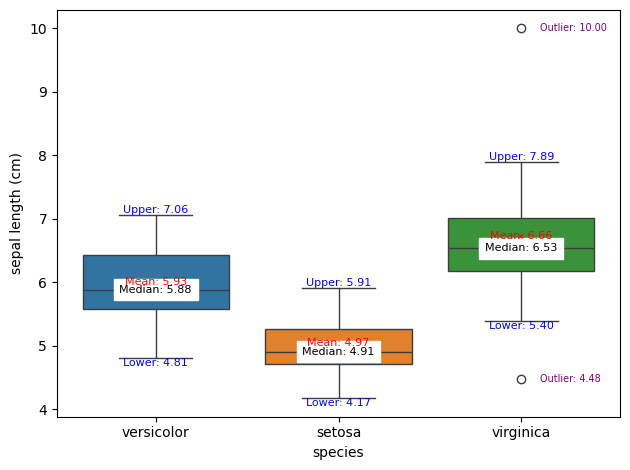

      species  Outliers (%)  Non-Outliers (%)  Outlier Count  Total Count
0      setosa      0.000000        100.000000              0           51
1  versicolor      0.000000        100.000000              0           50
2   virginica      3.921569         96.078431              2           51


In [64]:
ax = sns.boxplot(data=df, x="species", y="sepal length (cm)", hue="species")
species_list = df["species"].unique()


for i, species in enumerate(species_list):
    # Filter the data for each species
    vals = df[df["species"] == species]["sepal length (cm)"]
    
    # Calculate statistics
    median_val = vals.median()
    mean_val = vals.mean()
    q1 = vals.quantile(0.25)
    q3 = vals.quantile(0.75)
    iqr = q3 - q1
    whisker_low = vals[vals >= q1 - 1.5 * iqr].min()
    whisker_high = vals[vals <= q3 + 1.5 * iqr].max()
    outliers = vals[(vals < q1 - 1.5 * iqr) | (vals > q3 + 1.5 * iqr)]
    
    # Check if we have enough box artists
    if i < len(ax.artists):
        # Get the box for this species
        box = ax.artists[i]
        x = box.get_x() + box.get_width() / 2
        
        # Annotate median
        ax.text(x, median_val, f'Median: {median_val:.2f}', ha='center', va='center', 
                fontsize=8, color='black', backgroundcolor='white')
        
        # Annotate mean
        ax.text(x, mean_val, f'Mean: {mean_val:.2f}', ha='center', va='bottom', 
                fontsize=8, color='red')
        ax.plot(x, mean_val, 'D', color='red')  # Plot red diamond for mean
        
        # Annotate whiskers
        ax.text(x, whisker_low, f'Lower: {whisker_low:.2f}', ha='center', va='top', 
                fontsize=8, color='blue')
        ax.text(x, whisker_high, f'Upper: {whisker_high:.2f}', ha='center', va='bottom', 
                fontsize=8, color='blue')
        
        # Annotate outliers if any
        if len(outliers) > 0:
            for outlier in outliers:
                ax.text(x + 0.1, outlier, f'Outlier: {outlier:.2f}', ha='left', va='center', 
                        fontsize=7, color='purple')
    else:
        # Alternative: use the index directly if box artists don't match species count
        ax.text(i, median_val, f'Median: {median_val:.2f}', ha='center', va='center', 
                fontsize=8, color='black', backgroundcolor='white')
        ax.text(i, mean_val, f'Mean: {mean_val:.2f}', ha='center', va='bottom', 
                fontsize=8, color='red')
        ax.plot(i, mean_val, 'D', color='red')
        
        ax.text(i, whisker_low, f'Lower: {whisker_low:.2f}', ha='center', va='top', 
                fontsize=8, color='blue')
        ax.text(i, whisker_high, f'Upper: {whisker_high:.2f}', ha='center', va='bottom', 
                fontsize=8, color='blue')
        
        if len(outliers) > 0:
            for outlier in outliers:
                ax.text(i + 0.1, outlier, f'Outlier: {outlier:.2f}', ha='left', va='center', 
                        fontsize=7, color='purple')

plt.tight_layout()
plt.show()


#The Outliers and the percentage of outliers and non-outliers
group_column = 'species'

group_outlier_stats = []

for group, group_df in df.groupby(group_column):
    Q1 = group_df['sepal length (cm)'].quantile(0.25)
    Q3 = group_df['sepal length (cm)'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = group_df[(group_df['sepal length (cm)'] < lower_bound) | 
                        (group_df['sepal length (cm)'] > upper_bound)]
    
    percent_outliers = len(outliers) / len(group_df) * 100
    percent_non_outliers = 100 - percent_outliers

    group_outlier_stats.append({
        group_column: group,
        'Outliers (%)': percent_outliers,
        'Non-Outliers (%)': percent_non_outliers,
        'Outlier Count': len(outliers),
        'Total Count': len(group_df)
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(group_outlier_stats)
print(summary_df)

## Analysis - Boxplot shows distribution of Sepal Length (cm) by Species. For Virginica Species the outliers are for 2 out of 51 count which means this occur rarely in this particular species.

# ---------------------------------------------------------------------

# BOX PLOT for Sepal Width (cm)

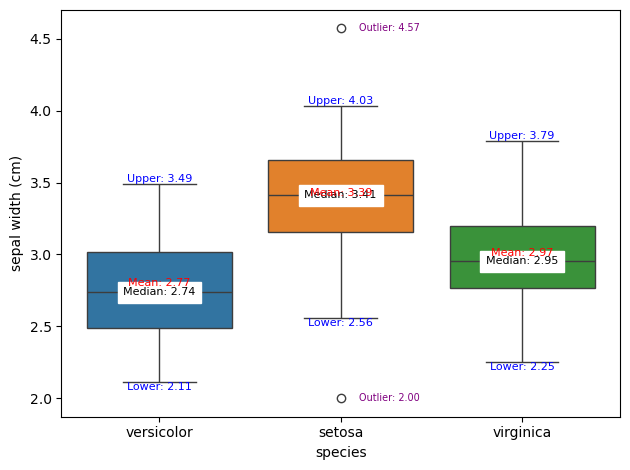

      species  Outliers (%)  Non-Outliers (%)  Outlier Count  Total Count
0      setosa      3.921569         96.078431              2           51
1  versicolor      0.000000        100.000000              0           50
2   virginica      0.000000        100.000000              0           51


In [66]:
ax = sns.boxplot(data = df, x = "species", y = "sepal width (cm)", hue="species")
species_list = df["species"].unique()

for i, species in enumerate(species_list):
    # Filter the data for each species
    vals = df[df["species"] == species]["sepal width (cm)"]
    
    # Calculate statistics
    median_val = vals.median()
    mean_val = vals.mean()
    q1 = vals.quantile(0.25)
    q3 = vals.quantile(0.75)
    iqr = q3 - q1
    whisker_low = vals[vals >= q1 - 1.5 * iqr].min()
    whisker_high = vals[vals <= q3 + 1.5 * iqr].max()
    outliers = vals[(vals < q1 - 1.5 * iqr) | (vals > q3 + 1.5 * iqr)]
    
    # Check if we have enough box artists
    if i < len(ax.artists):
        # Get the box for this species
        box = ax.artists[i]
        x = box.get_x() + box.get_width() / 2

        offset = 0.008 * (vals.max() - vals.min())
        
        # Annotate median
        ax.text(x, median_val + offset, f'Median: {median_val:.2f}', ha='center', va='center', 
                fontsize=8, color='black', backgroundcolor='white')
        
        # Annotate mean
        ax.text(x, mean_val - offset, f'Mean: {mean_val:.2f}', ha='center', va='bottom', 
                fontsize=8, color='red')
        ax.plot(x, mean_val, 'D', color='red')  # Plot red diamond for mean
        
        # Annotate whiskers
        ax.text(x, whisker_low, f'Lower: {whisker_low:.2f}', ha='center', va='top', 
                fontsize=8, color='blue')
        ax.text(x, whisker_high, f'Upper: {whisker_high:.2f}', ha='center', va='bottom', 
                fontsize=8, color='blue')
        
        # Annotate outliers if any
        if len(outliers) > 0:
            for outlier in outliers:
                ax.text(x + 0.1, outlier, f'Outlier: {outlier:.2f}', ha='left', va='center', 
                        fontsize=7, color='purple')
    else:
        # Alternative: use the index directly if box artists don't match species count
        ax.text(i, median_val, f'Median: {median_val:.2f}', ha='center', va='center', 
                fontsize=8, color='black', backgroundcolor='white')
        ax.text(i, mean_val, f'Mean: {mean_val:.2f}', ha='center', va='bottom', 
                fontsize=8, color='red')
        ax.plot(i, mean_val, 'D', color='red')
        
        ax.text(i, whisker_low, f'Lower: {whisker_low:.2f}', ha='center', va='top', 
                fontsize=8, color='blue')
        ax.text(i, whisker_high, f'Upper: {whisker_high:.2f}', ha='center', va='bottom', 
                fontsize=8, color='blue')
        
        if len(outliers) > 0:
            for outlier in outliers:
                ax.text(i + 0.1, outlier, f'Outlier: {outlier:.2f}', ha='left', va='center', 
                        fontsize=7, color='purple')

plt.tight_layout()
plt.show()

#The Outliers and the percentage of outliers and non-outliers
group_column = 'species'

group_outlier_stats = []

for group, group_df in df.groupby(group_column):
    Q1 = group_df['sepal width (cm)'].quantile(0.25)
    Q3 = group_df['sepal width (cm)'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = group_df[(group_df['sepal width (cm)'] < lower_bound) | 
                        (group_df['sepal width (cm)'] > upper_bound)]
    
    percent_outliers = len(outliers) / len(group_df) * 100
    percent_non_outliers = 100 - percent_outliers

    group_outlier_stats.append({
        group_column: group,
        'Outliers (%)': percent_outliers,
        'Non-Outliers (%)': percent_non_outliers,
        'Outlier Count': len(outliers),
        'Total Count': len(group_df)
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(group_outlier_stats)
print(summary_df)

## Analysis - Boxplot shows distribution of Sepal Width (cm) by Species. For Setosa Species the outliers are for 2 out of 51 count which means this occur rarely in this particular species.

# ---------------------------------------------------------------------

# BOX PLOT for Petal Length (cm)

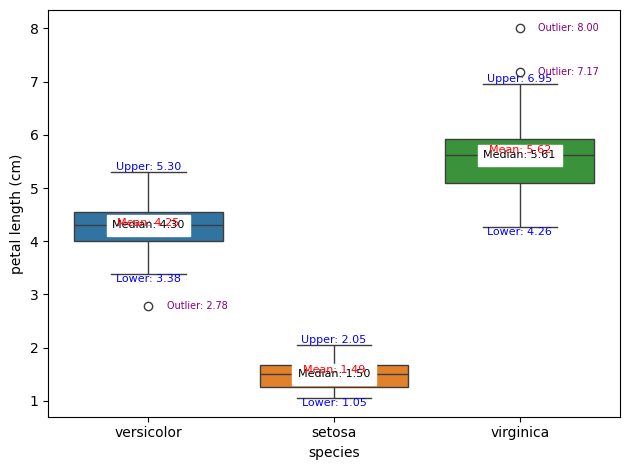

      species  Outliers (%)  Non-Outliers (%)  Outlier Count  Total Count
0      setosa      0.000000        100.000000              0           51
1  versicolor      2.000000         98.000000              1           50
2   virginica      3.921569         96.078431              2           51


In [67]:

ax = sns.boxplot(data = df, x = "species", y = "petal length (cm)", hue="species")
species_list = df["species"].unique()

for i, species in enumerate(species_list):
    # Filter the data for each species
    vals = df[df["species"] == species]["petal length (cm)"]
    
    # Calculate statistics
    median_val = vals.median()
    mean_val = vals.mean()
    q1 = vals.quantile(0.25)
    q3 = vals.quantile(0.75)
    iqr = q3 - q1
    whisker_low = vals[vals >= q1 - 1.5 * iqr].min()
    whisker_high = vals[vals <= q3 + 1.5 * iqr].max()
    outliers = vals[(vals < q1 - 1.5 * iqr) | (vals > q3 + 1.5 * iqr)]
    
    # Check if we have enough box artists
    if i < len(ax.artists):
        # Get the box for this species
        box = ax.artists[i]
        x = box.get_x() + box.get_width() / 2

        offset = 0.008 * (vals.max() - vals.min())
        
        # Annotate median
        ax.text(x, median_val + offset, f'Median: {median_val:.2f}', ha='center', va='center', 
                fontsize=8, color='black', backgroundcolor='white')
        
        # Annotate mean
        ax.text(x, mean_val - offset, f'Mean: {mean_val:.2f}', ha='center', va='bottom', 
                fontsize=8, color='red')
        ax.plot(x, mean_val, 'D', color='red')  # Plot red diamond for mean
        
        # Annotate whiskers
        ax.text(x, whisker_low, f'Lower: {whisker_low:.2f}', ha='center', va='top', 
                fontsize=8, color='blue')
        ax.text(x, whisker_high, f'Upper: {whisker_high:.2f}', ha='center', va='bottom', 
                fontsize=8, color='blue')
        
        # Annotate outliers if any
        if len(outliers) > 0:
            for outlier in outliers:
                ax.text(x + 0.1, outlier, f'Outlier: {outlier:.2f}', ha='left', va='center', 
                        fontsize=7, color='purple')
    else:
        # Alternative: use the index directly if box artists don't match species count
        ax.text(i, median_val, f'Median: {median_val:.2f}', ha='center', va='center', 
                fontsize=8, color='black', backgroundcolor='white')
        ax.text(i, mean_val, f'Mean: {mean_val:.2f}', ha='center', va='bottom', 
                fontsize=8, color='red')
        ax.plot(i, mean_val, 'D', color='red')
        
        ax.text(i, whisker_low, f'Lower: {whisker_low:.2f}', ha='center', va='top', 
                fontsize=8, color='blue')
        ax.text(i, whisker_high, f'Upper: {whisker_high:.2f}', ha='center', va='bottom', 
                fontsize=8, color='blue')
        
        if len(outliers) > 0:
            for outlier in outliers:
                ax.text(i + 0.1, outlier, f'Outlier: {outlier:.2f}', ha='left', va='center', 
                        fontsize=7, color='purple')

plt.tight_layout()
plt.show()



#The Outliers and the percentage of outliers and non-outliers
group_column = 'species'

group_outlier_stats = []

for group, group_df in df.groupby(group_column):
    Q1 = group_df['petal length (cm)'].quantile(0.25)
    Q3 = group_df['petal length (cm)'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = group_df[(group_df['petal length (cm)'] < lower_bound) | 
                        (group_df['petal length (cm)'] > upper_bound)]
    
    percent_outliers = len(outliers) / len(group_df) * 100
    percent_non_outliers = 100 - percent_outliers

    group_outlier_stats.append({
        group_column: group,
        'Outliers (%)': percent_outliers,
        'Non-Outliers (%)': percent_non_outliers,
        'Outlier Count': len(outliers),
        'Total Count': len(group_df)
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(group_outlier_stats)
print(summary_df)

## Analysis - Boxplot shows distribution of Petal Length (cm) by Species. 
## - For the Versicolor the outlisers are in one case that is the minimum outlier.
## - For the Virginica the outliers are in two cases which is similar to the data in the above in the Sepal Length (cm) which we can see in this case too. So, this is the is rare in this particular species.

# ---------------------------------------------------------------------

# BOX PLOT for Petal Width (cm)

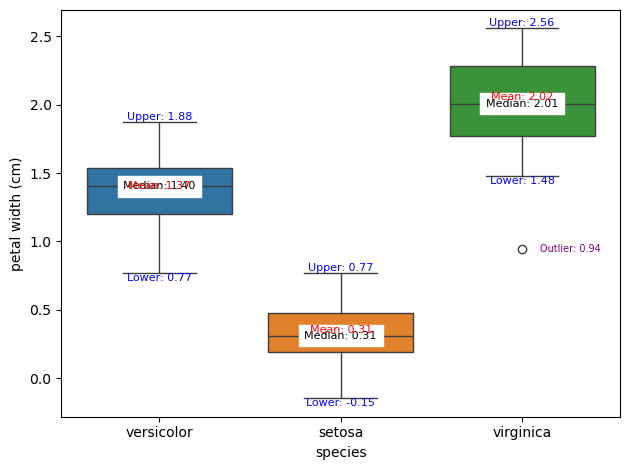

      species  Outliers (%)  Non-Outliers (%)  Outlier Count  Total Count
0      setosa      0.000000        100.000000              0           51
1  versicolor      0.000000        100.000000              0           50
2   virginica      1.960784         98.039216              1           51


In [68]:
#sns.boxplot(data = df, x = "species", y = "petal width (cm)", hue="species")

ax = sns.boxplot(data = df, x = "species", y = "petal width (cm)", hue="species")
species_list = df["species"].unique()

for i, species in enumerate(species_list):
    # Filter the data for each species
    vals = df[df["species"] == species]["petal width (cm)"]
    
    # Calculate statistics
    median_val = vals.median()
    mean_val = vals.mean()
    q1 = vals.quantile(0.25)
    q3 = vals.quantile(0.75)
    iqr = q3 - q1
    whisker_low = vals[vals >= q1 - 1.5 * iqr].min()
    whisker_high = vals[vals <= q3 + 1.5 * iqr].max()
    outliers = vals[(vals < q1 - 1.5 * iqr) | (vals > q3 + 1.5 * iqr)]
    
    # Check if we have enough box artists
    if i < len(ax.artists):
        # Get the box for this species
        box = ax.artists[i]
        x = box.get_x() + box.get_width() / 2

        offset = 0.008 * (vals.max() - vals.min())
        
        # Annotate median
        ax.text(x, median_val + offset, f'Median: {median_val:.2f}', ha='center', va='center', 
                fontsize=8, color='black', backgroundcolor='white')
        
        # Annotate mean
        ax.text(x, mean_val - offset, f'Mean: {mean_val:.2f}', ha='center', va='bottom', 
                fontsize=8, color='red')
        ax.plot(x, mean_val, 'D', color='red')  # Plot red diamond for mean
        
        # Annotate whiskers
        ax.text(x, whisker_low, f'Lower: {whisker_low:.2f}', ha='center', va='top', 
                fontsize=8, color='blue')
        ax.text(x, whisker_high, f'Upper: {whisker_high:.2f}', ha='center', va='bottom', 
                fontsize=8, color='blue')
        
        # Annotate outliers if any
        if len(outliers) > 0:
            for outlier in outliers:
                ax.text(x + 0.1, outlier, f'Outlier: {outlier:.2f}', ha='left', va='center', 
                        fontsize=7, color='purple')
    else:
        # Alternative: use the index directly if box artists don't match species count
        ax.text(i, median_val, f'Median: {median_val:.2f}', ha='center', va='center', 
                fontsize=8, color='black', backgroundcolor='white')
        ax.text(i, mean_val, f'Mean: {mean_val:.2f}', ha='center', va='bottom', 
                fontsize=8, color='red')
        ax.plot(i, mean_val, 'D', color='red')
        
        ax.text(i, whisker_low, f'Lower: {whisker_low:.2f}', ha='center', va='top', 
                fontsize=8, color='blue')
        ax.text(i, whisker_high, f'Upper: {whisker_high:.2f}', ha='center', va='bottom', 
                fontsize=8, color='blue')
        
        if len(outliers) > 0:
            for outlier in outliers:
                ax.text(i + 0.1, outlier, f'Outlier: {outlier:.2f}', ha='left', va='center', 
                        fontsize=7, color='purple')

plt.tight_layout()
plt.show()


#The Outliers and the percentage of outliers and non-outliers
group_column = 'species'

group_outlier_stats = []

for group, group_df in df.groupby(group_column):
    Q1 = group_df['petal width (cm)'].quantile(0.25)
    Q3 = group_df['petal width (cm)'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = group_df[(group_df['petal width (cm)'] < lower_bound) | 
                        (group_df['petal width (cm)'] > upper_bound)]
    
    percent_outliers = len(outliers) / len(group_df) * 100
    percent_non_outliers = 100 - percent_outliers

    group_outlier_stats.append({
        group_column: group,
        'Outliers (%)': percent_outliers,
        'Non-Outliers (%)': percent_non_outliers,
        'Outlier Count': len(outliers),
        'Total Count': len(group_df)
    })

# Create a summary DataFrame
summary_df = pd.DataFrame(group_outlier_stats)
print(summary_df)

## 2. (b) Analysis - Boxplot shows distribution of Petal Width (cm) by Species. 
## - For the Virginica Species the outliers are for 1 out of 51 count which means this occur rarely in this particular species. Which also occurs in the petal Length (cm) which we had seen in the above case.

# ---------------------------------------------------------------------

# 3. The Scatterplot Matrix

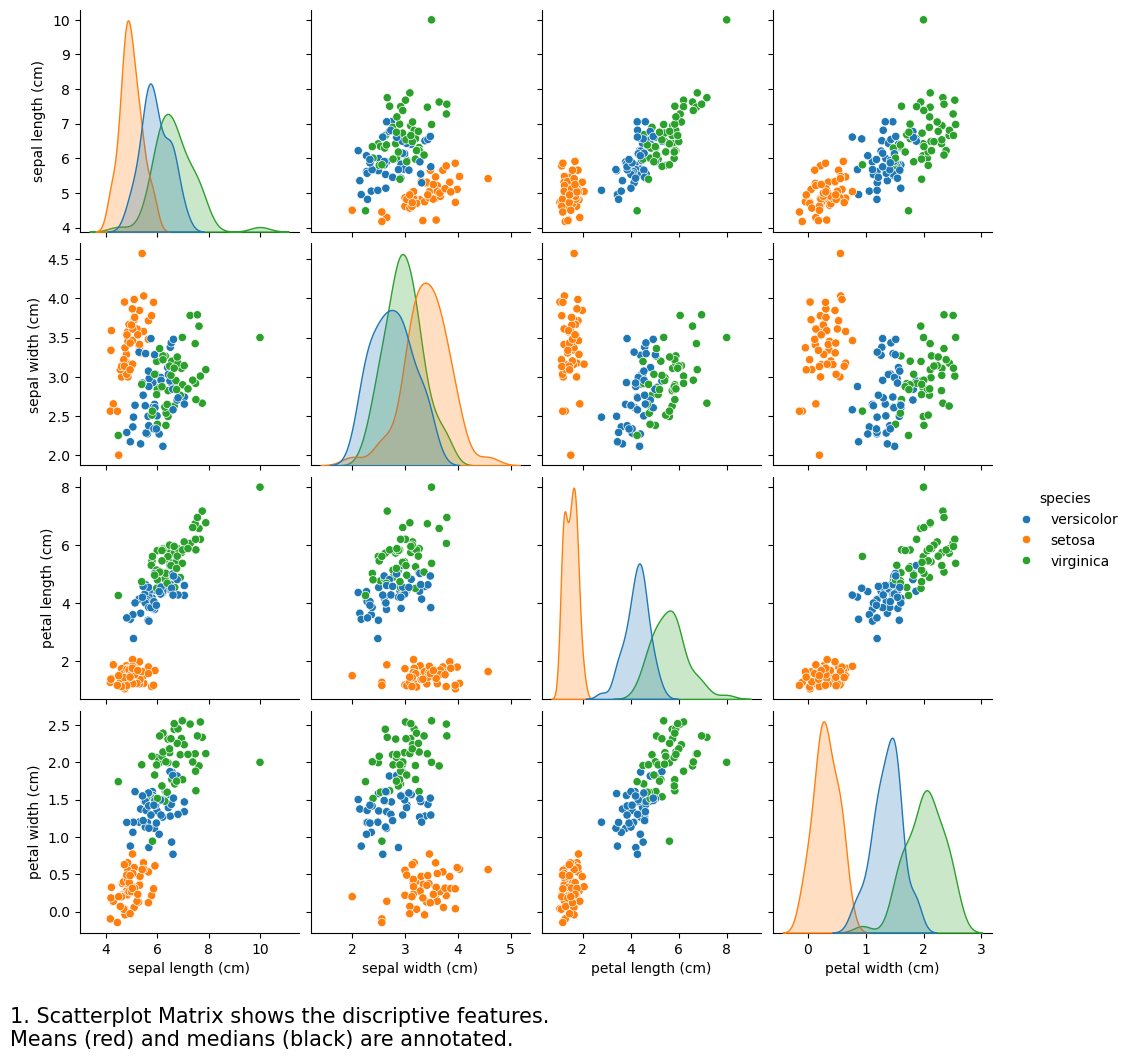

In [20]:
sns.pairplot(df, hue="species")

plt.figtext(0.0, -0.05, 
            "1. Scatterplot Matrix shows the discriptive features.\n"
            "Means (red) and medians (black) are annotated.",
            wrap=True, horizontalalignment='left', fontsize=15)

plt.show()

## 3. (a). Explain which two features show the clearest separation between species.
## - The Petal lenght (cm) and the Petal Width (cm) these two features show clear separation visulally when we observe. As though their is a bit overlap but compared to other features the overlap is not that much.

## 3. (b). Explain the plot
## - The Setosa clusters are always seen separate from the other clusters in the features.
## - The Versicolor and Virginica clusters can be seen close and overlapping in many cases.
## - The Sepal lenght and the petal width, Petal length and Petal width,Sepal length and Petal Width clusters are distributed in the Positive Correlation.
## - The Petal Width and Sepal Width clusters are distributed which suggests no correlation.


# 4. The HeatMap 

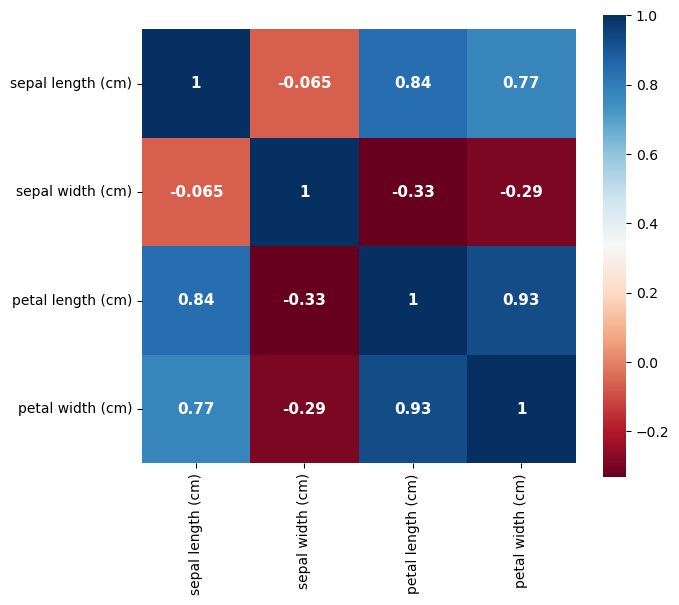

In [21]:
df2_cpy = df.copy();
df2_cpy = df2_cpy.drop(columns = ["species"])
corr1 = df2_cpy.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(corr1, annot = True, square = True, cmap='RdBu', annot_kws={'fontsize':11, 'fontweight':'bold'})
plt.show()


## Positively and Negatively Correlated features 
## - Positively correlated features are Petal Lenght and Petal Width.(0.98)
## - Negatively correlated features are Petal Width and Sepal Width.(-0.29)

## Analyzing
## - Sepal Length has positive correlation with Petal Lenght.
## - Petal Width has negative correlation with the Sepal Width.
## - Petal Width and Petal Length has the strong correlation.

# ---------------------------------------------------------------------

## SPLIT THE DATA

In [80]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.993117,2.500989,4.542148,1.348742,versicolor
1,5.657568,3.714626,1.800290,0.531637,setosa
2,7.751423,2.662903,7.174372,2.335111,virginica
3,5.938142,3.034625,4.448674,1.426435,versicolor
4,7.054747,2.741609,4.268965,1.469104,versicolor
...,...,...,...,...,...
147,5.857968,3.949036,1.170024,0.305553,setosa
148,5.966645,2.334692,3.927622,1.186082,versicolor
149,7.197063,2.845467,5.882156,2.105997,virginica
150,10.000000,3.500000,8.000000,2.000000,virginica


In [81]:
df['sepal width (cm)'] = df['sepal width (cm)'].fillna(df['sepal width (cm)'].mean())

In [76]:
print(df.loc[76,'sepal width (cm)']) #Testing whether the mean data is updated or not in the data

3.0505301438798096


## Spliting the data - the training data is 80% and test data is 20%

In [202]:
'''
stratify_col = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

train_data, test_data = train_test_split(
    df,
    test_size = 0.2,
    stratify = stratify_col,
    shuffle = True
)

print(stratify_col.nunique()) 

print(len(train_data))
print(len(test_data))
'''

X = df.drop(columns=["species"])  # All columns except 'species'
y = df["species"] # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle = True, random_state = 42)

# Print shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

display(X_train)


X_train shape: (121, 4), X_test shape: (31, 4)
y_train shape: (121,), y_test shape: (31,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
20,4.745258,3.369480,1.634967,-0.043371
96,4.290544,2.654389,1.874828,0.137855
80,6.337395,2.380175,5.026282,2.007098
35,6.346459,2.535236,4.769487,1.599846
36,6.433005,3.028814,4.492073,1.393067
...,...,...,...,...
65,5.330871,3.304524,1.367155,0.472022
5,5.320897,3.342173,1.590587,0.366788
1,5.657568,3.714626,1.800290,0.531637
4,7.054747,2.741609,4.268965,1.469104


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
126,7.493184,2.916411,6.202521,1.880764
110,6.605663,2.841501,5.008664,1.823922
3,5.938142,3.034625,4.448674,1.426435
44,5.475459,4.030270,1.234634,0.568743
56,4.842466,3.155886,1.266159,0.432387
37,4.842301,3.571461,1.417094,0.216040
106,6.727715,2.952301,5.408378,1.974801
17,5.808772,2.605290,4.172777,1.607833
144,5.243491,3.534856,1.677031,0.231007
52,5.687865,2.978300,4.402713,1.541520


# ---------------------------------------------------------------------

# 3. Use StandardScaler to put all descriptive features on the same scale.

In [215]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform X_train, transform X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


#print("Scaled Training Data:\n", X_train_scaled.head())
#print("\nScaled Testing Data:\n", X_test_scaled.head())


# K value using the Square Root of the number of records

In [216]:
k = int(np.sqrt(len(y_train)))

# KNN with Euclidean Distance
knn_euclidean = KNeighborsClassifier(n_neighbors = k, metric="euclidean")
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)

# Accuracy
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
print(f"Accuracy (Euclidean): {accuracy_euclidean:.2f}")
print("K value is ", k)


Accuracy (Euclidean): 0.90
K value is  11


# K value is 5

In [217]:
# KNN with Euclidean Distance
knn_euclidean = KNeighborsClassifier(n_neighbors = 5, metric="euclidean")
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)

# Accuracy
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
print(f"Accuracy (Euclidean): {accuracy_euclidean:.2f}")


Accuracy (Euclidean): 0.94


In [218]:
# KNN with Manhattan Distance
knn_manhattan = KNeighborsClassifier(n_neighbors = 5, metric="manhattan")
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)

# Accuracy
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print(f"Accuracy (Manhattan): {accuracy_manhattan:.2f}")


Accuracy (Manhattan): 0.90


# K value is 3

In [219]:
# KNN with Euclidean Distance
knn_euclidean = KNeighborsClassifier(n_neighbors = 3, metric="euclidean")
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)

# Accuracy
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
print(f"Accuracy (Euclidean): {accuracy_euclidean:.2f}")


Accuracy (Euclidean): 0.94


In [220]:
# KNN with Manhattan Distance
knn_manhattan = KNeighborsClassifier(n_neighbors = 3, metric="manhattan")
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)

# Accuracy
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print(f"Accuracy (Manhattan): {accuracy_manhattan:.2f}")


Accuracy (Manhattan): 0.90


## Accuracy - The accuracy of the algorithm when checked with the K with values
## If K value is 3 then the accuracy is 84% for the Manhattan and 87% for the Euclidean.
## If the K value is 5 then the accuracy is 90% for both the Manhattan and Euclidean.
## If the K value is Square Root of the number of elements then the accuacy is 87%.

## So, Choosing the K value to be 5 which gives the accuracy of 90%.

In [221]:
# Initialize KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
    
# Train the model
knn.fit(X_train_scaled, y_train)
    
# Make predictions
y_pred = knn.predict(X_test_scaled)
    
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy with k=5: {accuracy:.2f}")

KNN Model Accuracy with k=5: 0.94


# The K value and the Accuracy on a 2D plot with N-Fold Validation

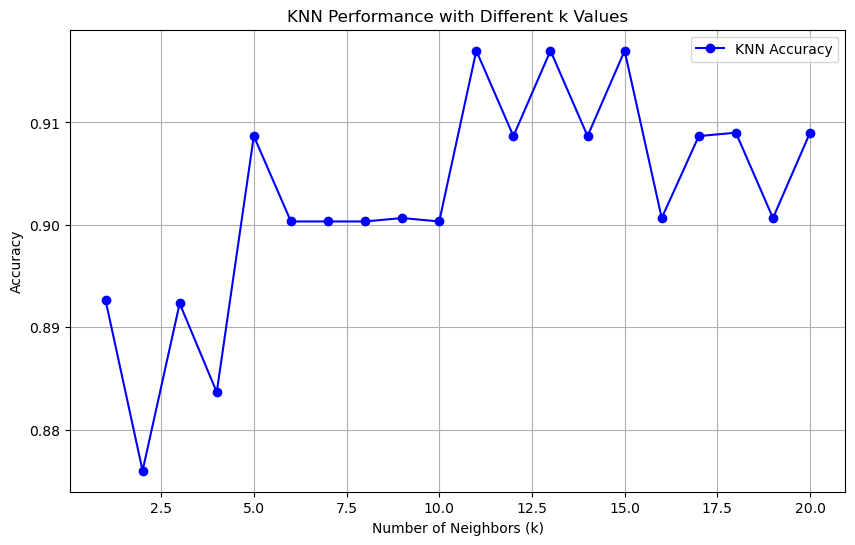

In [229]:
# Define range of k values (1 to 20)
k_values = list(range(1, 21))
accuracy_scores = []

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring="accuracy")
    accuracy_scores.append(scores.mean())  # Store mean accuracy for each k

# Plot k vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker="o", linestyle="-", color="b", label="KNN Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Performance with Different k Values")
plt.legend()
plt.grid()
plt.show()



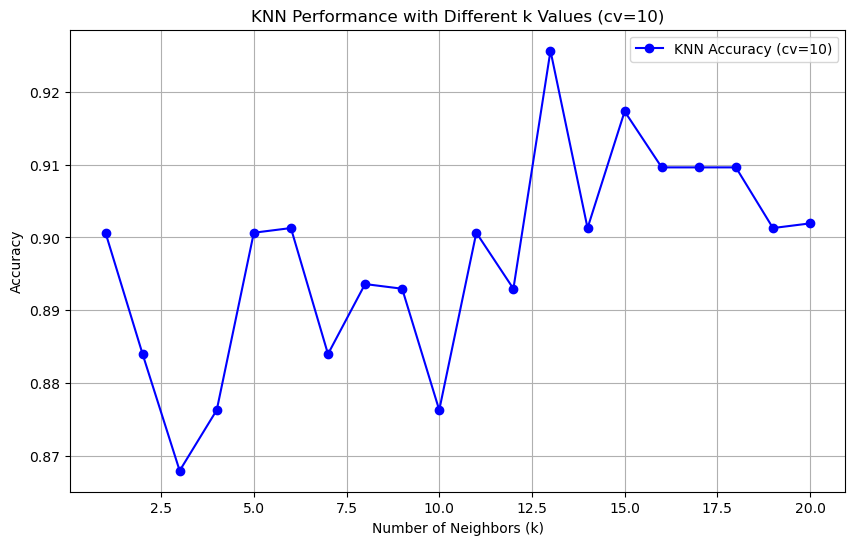

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define range of k values (1 to 20)
k_values = list(range(1, 21))
accuracy_scores = []

# Set the number of folds (change `cv` as needed)
n_folds = 10  # You can change this to any number like 5, 7, etc.

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=n_folds, scoring="accuracy")
    accuracy_scores.append(scores.mean())  # Store mean accuracy for each k

# Plot k vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker="o", linestyle="-", color="b", label=f"KNN Accuracy (cv={n_folds})")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title(f"KNN Performance with Different k Values (cv={n_folds})")
plt.legend()
plt.grid()
plt.show()

In [175]:
import pandas as pd

# Create a DataFrame for better visualization
misclassified = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Index": range(len(y_test))})

# Filter rows where predictions don't match actual labels
wrong_predictions = misclassified[misclassified["Actual"] != misclassified["Predicted"]]

# Display misclassified samples
print(wrong_predictions)

         Actual   Predicted  Index
84   versicolor   virginica      0
111   virginica  versicolor      5
98    virginica  versicolor      6


In [176]:
import pandas as pd

# Create a DataFrame to store actual vs predicted labels
misclassified = pd.DataFrame({"Actual Label": y_test, "Predicted Label": y_pred})

# Filter out misclassified samples
wrong_predictions = misclassified[misclassified["Actual Label"] != misclassified["Predicted Label"]]

# Print misclassified flower samples in table format
print("Misclassified Flowers:")
print(wrong_predictions.to_string(index=False))

Misclassified Flowers:
Actual Label Predicted Label
  versicolor       virginica
   virginica      versicolor
   virginica      versicolor


# Navie Bayes 